# **Task 1 - Warm Up Covid-19 Data**

### **a)** Perform initial data analysis to quickly get an overview of the data set. 

Use methods such as: 
- info()
- describe()
- value_counts()
- head()
- columns
- index.

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

The data down below represent the first five rows in the sheet "Veckodata Riket" (National Weekly Data). By using the **.head()** method, we can quickly examine the initial rows of the dataset to understand its structure and contents. This initial exploration helps us gain a better understanding of what kind of data to expect and what each column represents. 

For example we can tell that it seems to be only numerical data, even though lets say 'år'(year) and 'veckonummer'(week number) is infact a categorical data. 

Some of the values are number of new cases, number of desceased and some are in percent values such as 'Antal_avlidna_milj_inv_vecka' (Number of desceased per milj. and week) and 'Antal_fall_100000inv_vecka' (Number of desceased per one thousand and week). Hence the values are rounded to the closest integer the values are 0 in some cases where there infact are some desceased. 

In [22]:
data = pd.read_excel("Data\Folkhalsomyndigheten_Covid19.xlsx", sheet_name="Veckodata Riket")
df = pd.DataFrame(data)
df.head()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0


When using the **.describe()** method, we can generate summary statistics of the numeric columns in the dataset, including measures such as mean, standard deviation, minimum, maximum, and quartiles. Analyzing these statistics helps us gain insights into the distribution and variability of the data. 

For instance, examining the 'Antal_avlidna_vecka' column through this method allows us to understand the range of weekly deceased counts, identify outliers, and assess the overall pattern of mortality rates. This analysis is essential for detecting trends, anomalies, and potential areas for further investigation in the dataset. For example at most it where 265,043 infected in just one week and the least where 0, but the mean where 18,378 infected per week over the whole period of time.

In [23]:
df.describe()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
count,142.000000,142.000000,142.000000,142.000000,142.000000,1.420000e+02,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,2020.957746,26.035211,18378.345070,177.197183,354.169014,1.125288e+06,10843.281690,67.176056,6000.464789,144.936620,14.000000,12321.154930,1187.840841
std,0.797809,14.228835,38569.455753,371.689114,725.677174,9.618084e+05,9265.100705,73.435000,3076.853993,173.659331,16.796551,6103.235009,587.255605
min,2020.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,14.000000,3075.000000,30.000000,59.750000,1.014860e+05,982.500000,14.000000,2643.750000,25.250000,2.425000,5880.000000,569.375000
50%,2021.000000,26.000000,5531.000000,53.000000,107.500000,1.085848e+06,10461.500000,27.500000,7559.500000,77.500000,7.450000,14610.500000,1407.650024
75%,2022.000000,37.750000,21125.000000,203.500000,421.250000,2.423603e+06,23350.500000,109.000000,8863.250000,185.500000,17.950000,17177.750000,1654.999969
max,2022.000000,53.000000,265043.000000,2554.000000,5024.000000,2.609725e+06,25144.000000,289.000000,9539.000000,664.000000,64.300003,20581.000000,1982.900024


From the below code we can examine the full set of columns and index in our excel sheet. The dataset has 142 rows (excluding the header) and starts on index 0 and ends on index 141. We can also tell that the index is evenly spread with 1 step per row (0, 1, 2, 3...). From the columns we can tell what the data describes.

In [24]:
print(df.columns)
print(df.index)

Index(['år', 'veckonummer', 'Antal_fall_vecka', 'Antal_fall_100000inv_vecka',
       'Antal_fall_100000inv_14dagar', 'Kum_antal_fall', 'Kum_fall_100000inv',
       'Antal_nyaintensivvårdade_vecka', 'Kum_antal_intensivvårdade',
       'Antal_avlidna_vecka', 'Antal_avlidna_milj_inv_vecka',
       'Kum_antal_avlidna', 'Kum_antal_avlidna_milj_inv'],
      dtype='object')
RangeIndex(start=0, stop=142, step=1)


Using the **.tail()** method is another way of examine the length of the index on our dataframe. Using this in combination with **.head()** we can tell that the sheet is valid for the timeperiod week 6 in the year 2020 to week 42 in the year 2022. We can also tell the max values for the columns with cumulative values such as number of cases, deceased and hospitalized.

In [25]:
df.tail()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
137,2022,38,4669,45,93,2585507,24910,22,9475,88,8.5,20303,1956.099976
138,2022,39,13532,130,175,2599039,25041,15,9490,92,8.9,20395,1965.000000
139,2022,40,3999,39,169,2603038,25079,19,9509,88,8.5,20483,1973.400024
140,2022,41,3408,33,72,2606446,25112,13,9522,73,7.0,20556,1980.500000
141,2022,42,3279,32,65,2609725,25144,17,9539,25,2.4,20581,1982.900024


The **.value_counts()** method provides a summary of the number of rows (representing weeks) in our dataset. In the year 2020, there are 48 weeks recorded, while in 2021, there are 52 weeks, indicating a complete year's data. Conversely, for 2022, there are 42 weeks available.

When we apply the method to the 'Antal_fall_100000inv_vecka' column, we gain valuable insights. The most frequent value is 41 infected individuals per 100,000 citizens, closely followed by instances where there are no reported infections (0 infected cases). 

In [26]:
df['år'].value_counts()

år
2021    52
2020    48
2022    42
Name: count, dtype: int64

In [27]:
df['Antal_fall_100000inv_vecka'].value_counts()

Antal_fall_100000inv_vecka
41     7
0      4
18     4
13     3
19     3
      ..
228    1
205    1
189    1
199    1
32     1
Name: count, Length: 100, dtype: int64

### **b)** Merge the columns "år" and "veckonummer" into a column named "Vecka" with the following format:

Vecka

    2020v6
    2020v7
    ...
    2022v41

This code will combine the columns  "år" (year) and "veckonummer" (week number) in the DataFrame. Then the 'år' column are renamed to 'Vecka'. Last we'll remove the column 'veckonummer' using **.drop()** method. When using **.rename()** it's imortant to use inplace=True to actually change the dataframe.

In [28]:
df['år'] = df['år'].astype(str) + 'v' + df['veckonummer'].astype(str)
df.rename(columns={'år': 'Vecka'}, inplace=True)
df = df.drop(columns='veckonummer')
df.head(3)

,Vecka,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020v6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020v7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020v8,0,0,0,1,0,0,0,0,0.0,0,0.0


### **c)** Draw a line graph showing deceased per week from 2020v6 to 2022v42.

Down below we import Seaborn and Matplotlib to plot the graphs. The background is changed with the .set_theme() method. The columns we choose to plot is 'Vecka' for x and 'Antal_avlidna_vecka' for y. The color is set to blue for the line and the label for the line we choose to name 'Number of deseased'. To mark the values we set the marker to 'o'. 

Since we have aboy 140 values in our 'Vecka' column, we choose a set of values for tickmarks on the x-axis and labeling them for better understanding what they represent. After this we set our title and labels for x- and y-axis.

In the end we save the plot usingsavefig() method.

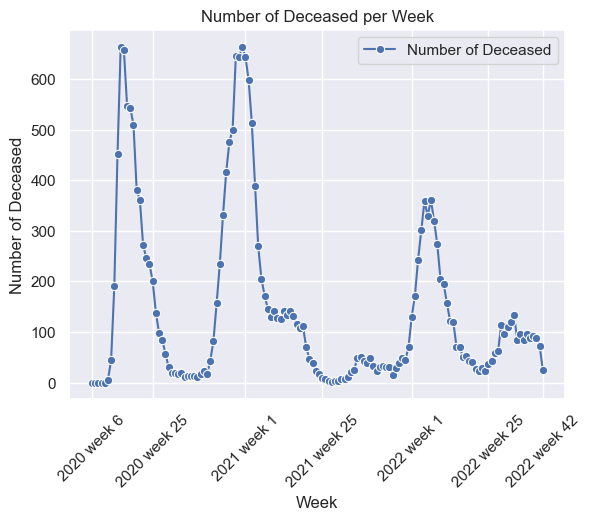

In [29]:
sns.set_theme(style="darkgrid")
sns.lineplot(data=df, x='Vecka', y='Antal_avlidna_vecka', color='b', label='Number of Deceased', marker='o')

# Choose the number of x ticks to display and labels
ticks_weeks = ['2020v6', '2020v25', '2021v1', '2021v25', '2022v1', '2022v25', '2022v42']
week_labels = ['2020 week 6', '2020 week 25', '2021 week 1', '2021 week 25', '2022 week 1', '2022 week 25', '2022 week 42']
plt.xticks(ticks_weeks, week_labels, rotation=45)

# Set plot title and labels
plt.title('Number of Deceased per Week')
plt.xlabel('Week')
plt.ylabel('Number of Deceased')

# Display legend
plt.legend()

# Save the plot as a PNG file in the Visualizations folder
plt.savefig("Visualizations/number_of_deceased_per_week.png")

# Show the plot
plt.show()



Down below we find the same values, but this time plotted with Plotly Express. We change the name on the labels with a dict for better understanding of what the value represent. Also this plot we save in our folder Visualizations but as an html file to keep an interactive interface.

In [30]:
fig = px.line(
    df,
    x='Vecka',
    y='Antal_avlidna_vecka',
    template='plotly_dark',
    labels=dict(Vecka="Week", Antal_avlidna_vecka="Number of deceased",),
    title='Number of deceased per Week'
)
fig.write_html("Visualizations/number_of_deceased_per_week.html")
fig.show()

The above graphs shows four tops in our timeperiod, one in the spring of 2020, one in the turn of the year 2020/2021 and two smaller tops in the begining of 2022 and one in the end of summer 2022.

### **d)** Draw a line graph showing new cases of infected per week from 2020v6 to 2022v42.

Down below we use a similar way of plotting as above, but we change y to 'Antal_fall_vecka' (number of cases by week).

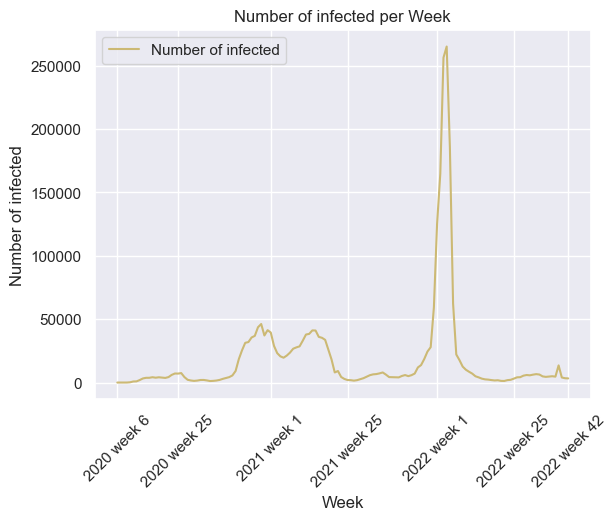

In [31]:
# Create a line plot with Seaborn
sns.lineplot(data=df, x='Vecka', y='Antal_fall_vecka', color='y', label='Number of infected')

# Choose the number of x ticks to display
plt.xticks(ticks_weeks, week_labels, rotation=45)

plt.title('Number of infected per Week')
plt.xlabel('Week')
plt.ylabel('Number of infected')
plt.legend()
plt.savefig("Visualizations/number_of_infected_per_week.png")
plt.show()

Down below it's the same values as above but with Plotly Express to get a interactive interface.

In [32]:
fig = px.line(
    df,
    x='Vecka',
    y='Antal_fall_vecka',
    template='plotly_dark',
    labels=dict(Vecka="Week", Antal_fall_vecka="Number of cases",),
    title='Number of infected per Week'
)
fig.write_html("Visualizations/number_of_infected_per_week.html")
fig.show()

### **e)** Draw line graphs of both deceased per week and infected per week in the same window from 2020v6 to 2022v42.

Similar approach as in previous graphs, but here we write to line plot that will be displayed in the same figure. The values are set to be logarithmic values for a better comparison of the values. The plot for number of cases is set to yellow and number of deceased is set to blue.

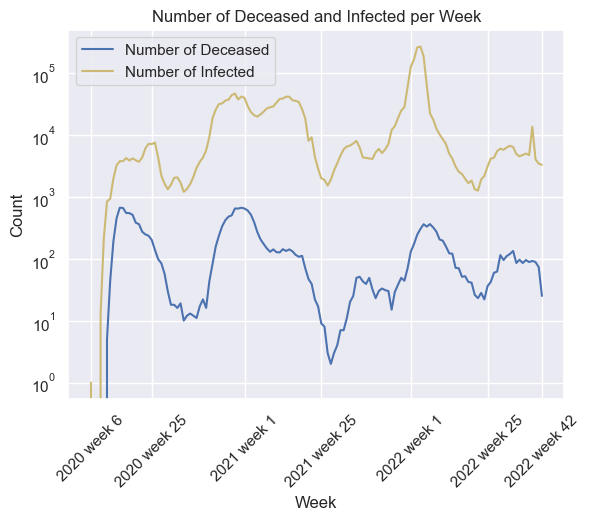

In [33]:
# Create a line plot with Seaborn for the number of deceased
sns.lineplot(data=df, x='Vecka', y='Antal_avlidna_vecka', color='b', label='Number of Deceased').set_yscale("log")

# Add another line for the number of infected individuals
sns.lineplot(data=df, x='Vecka', y='Antal_fall_vecka', color='y', label='Number of Infected').set_yscale("log")

plt.xticks(ticks_weeks, week_labels, rotation=45)

plt.title('Number of Deceased and Infected per Week')
plt.xlabel('Week')
plt.ylabel('Count')
plt.legend()
plt.savefig("Visualizations/number_of_deceased_and_infected_per_week.png")
plt.show()

The same as above but with plotly. Here we can take two values for y privided in a list. We also use the update_yaxes() methods to set the titles for our y values.

In [34]:
fig = px.line(
    df,
    x='Vecka',
    y=['Antal_avlidna_vecka', 'Antal_fall_vecka'],
    log_y=True,  # Set y-axis scale to logarithmic
    template='plotly_dark',
    labels=dict(Vecka="Week", value='Number of cases', variable='Infected and deceased'),
    title='Number of Deceased and Infected per Week',
)

fig.update_yaxes(title_text='Number of Deceased', row=1, col=1)
fig.update_yaxes(title_text='Number of Infected', row=1, col=2)

fig.write_html("Visualizations/number_of_deceased_and_infected_per_week.html")
fig.show()

### **f)** Draw line graph of cumulative number of cases from 2020v6 to 2022v42

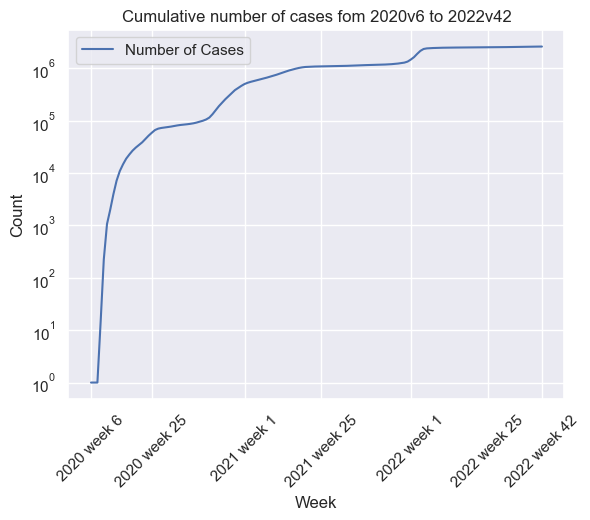

In [35]:
sns.lineplot(data=df, x='Vecka', y='Kum_antal_fall', color='b', label='Number of Cases').set_yscale("log")
plt.title('Cumulative number of cases fom 2020v6 to 2022v42')
plt.xlabel('Week')
plt.xticks(ticks_weeks, week_labels, rotation=45)
plt.ylabel('Count')
plt.legend()
plt.savefig("Visualizations/cumulative_number_of_cases_2020_to_2022.png")
plt.show()

In [36]:
fig = px.line(
    df,
    x='Vecka',
    y='Kum_antal_fall',
    template='plotly_dark',
    labels=dict(Vecka="Week", Kum_antal_fall='Cumulative number of cases'),
    title='Cumulative number of cases fom 2020v6 to 2022v42'
)
fig.update_yaxes(type='log')  # Set y-axis scale to logarithmic 
fig.write_html("Visualizations/cumulative_number_of_cases_2020_to_2022.html")
fig.show()